In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Load COPX Data

In [3]:
copx = yf.Ticker("COPX").history(period="max", interval="1d").reset_index()# yf.Ticker("COPX").history(period="1y", interval="1h")
copx = copx.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])
copx['Date'] = pd.to_datetime(copx['Date'].dt.date)
copx = copx.sort_values(by='Date')
copx.head(3)

,Date,Open,High,Low,Close,Volume
0,2010-04-20,33.153594,33.153594,32.597325,32.664078,1933
1,2010-04-21,32.486071,32.708578,32.063307,32.152309,2900
2,2010-04-22,32.018806,32.018806,31.529290,31.974306,3600


## Feature Engineering

In [4]:

# High and Low as a percentage of Open
copx['High/Open(%)'] = copx['High']/ copx['Open']
copx['Low/Open(%)'] = copx['Low'] / copx['Open']

# Daily return based on Close
copx['Daily Return'] = copx['Close'].pct_change()  

# Date features
copx['Day of Week'] = copx['Date'].dt.day_name()
copx['Month'] = copx['Date'].dt.month
copx['Year'] = copx['Date'].dt.year

# Lag features
LAGS_DAY = [1, 2, 3, 4, 5, 10, 15, 20]
for LAG_DAY in LAGS_DAY:
    copx[f'High/Open(%) [{LAG_DAY} day]'] = copx['High/Open(%)'].shift(LAG_DAY)
    copx[f'Low/Open(%) [{LAG_DAY} day]'] = copx['Low/Open(%)'].shift(LAG_DAY)

# Moving Averages
copx['MA5'] = copx['Close'].shift(1).rolling(window = 5).mean()
copx['MA10'] = copx['Close'].shift(1).rolling(window = 10).mean()
copx['MA20'] = copx['Close'].shift(1).rolling(window = 20).mean()
copx['MA100'] = copx['Close'].shift(1).rolling(window = 100).mean()


copx = copx.dropna().reset_index()

starting_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in starting_cols:
    copx[f'Prev{col}'] = copx[col].shift(1)

### Using other ETFs

- First Quantum Minerals Ltd. (FM.TO)
- Lundin Mining Corporation (LUN.TO)
- Capstone Copper Corp. (CS.TO)
- Boliden AB (BOL.ST)
- Ivanhoe Mines Ltd. (IVN.TO)
- Glencore plc (GLEN.L)
- Southern Copper Corporation (SCCO)
- Teck Resources Limited (TECK.B.TO)
- Freeport-McMoRan Inc. (FCX)
- BHP Group Limited (BHP.AX)

In [5]:
tickers = ['FM.TO', 'LUN.TO', 'CS.TO', 'BOL.ST', 'IVN.TO'] 
LAG_DAYS = [1, 2, 3, 4, 5]
for ticker in tickers:
    data =  yf.Ticker(ticker).history(period="max", interval="1d").reset_index()
    data['Date'] = pd.to_datetime(data['Date'].dt.date)
    data = data.sort_values(by='Date')
    for LAG_DAY in LAG_DAYS:
        feature1 = f'{ticker} Daily Return [{LAG_DAY} day]'
        feature2 = f'{ticker} High/Open(%) [{LAG_DAY} day]'
        data[feature1] = data['Close'].pct_change().shift(LAG_DAY)
        data[feature2] = (data['High'] / data['Open']).shift(LAG_DAY)
        
        features = data[['Date', feature1, feature2]]
        copx = pd.merge(copx, features, on='Date', how='left')
        
copx

,index,Date,Open,High,Low,Close,Volume,High/Open(%),Low/Open(%),Daily Return,...,IVN.TO Daily Return [1 day],IVN.TO High/Open(%) [1 day],IVN.TO Daily Return [2 day],IVN.TO High/Open(%) [2 day],IVN.TO Daily Return [3 day],IVN.TO High/Open(%) [3 day],IVN.TO Daily Return [4 day],IVN.TO High/Open(%) [4 day],IVN.TO Daily Return [5 day],IVN.TO High/Open(%) [5 day]
0,100,2010-09-10,30.372253,30.461255,30.216498,30.439005,3733,1.002930,0.994872,0.005143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,2010-09-13,31.084277,31.640545,31.017524,31.640545,3133,1.017895,0.997853,0.039474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,102,2010-09-14,31.351285,32.041058,31.351285,31.707296,4133,1.022001,1.000000,0.002110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,2010-09-15,31.596042,31.751799,31.573792,31.707296,1500,1.004930,0.999296,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,2010-09-16,31.751793,31.863045,31.685040,31.863045,2867,1.003504,0.997898,0.004912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,3682,2024-12-04,42.720001,42.919998,42.360001,42.500000,873600,1.004682,0.991573,-0.005615,...,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607,0.001604,1.020256
3583,3683,2024-12-05,42.380001,42.900002,42.299999,42.750000,1188400,1.012270,0.998112,0.005882,...,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607
3584,3684,2024-12-06,42.639999,42.650002,41.889999,41.980000,1012100,1.000235,0.982411,-0.018012,...,0.014019,1.027055,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845
3585,3685,2024-12-09,43.509998,44.580002,43.509998,43.560001,2144200,1.024592,1.000000,0.037637,...,-0.003584,1.012308,0.014019,1.027055,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110


## Baseline

### Baseline - buy and hold

Buy at the very first open, sell at the most recent close.

In [6]:
copx_baseline = yf.Ticker("COPX").history(period="max", interval="1d").reset_index()
copx_baseline = copx_baseline.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])
copx_baseline['Date'] = pd.to_datetime(copx_baseline['Date'].dt.date)
copx_baseline = copx_baseline.sort_values(by='Date')
copx_baseline = copx_baseline.dropna().reset_index()
copx_baseline = copx_baseline.drop(columns=['index'])

In [7]:
principal = 100 # Starting dollars

buy_price = copx_baseline['Open'].iloc[0]
sell_price = copx_baseline['Close'].iloc[-1]

total_value = principal / buy_price * sell_price
profit_and_loss_percentage = (total_value - principal) / principal
profit_and_loss_percentage_formatted = f'{round(profit_and_loss_percentage, 4) * 100}%'
profit_and_loss_percentage_formatted

'29.43%'

### Baseline - buy daily, simple take profit threshold

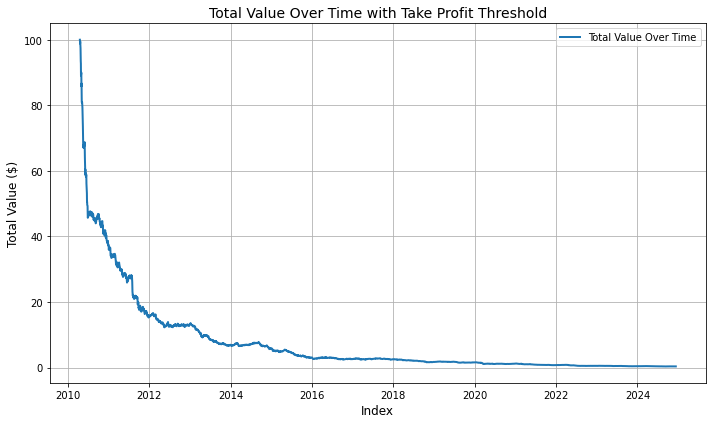

,Date,Open,High,Low,Close,Volume,Value Sold Per Stock,Total Value
0,2010-04-20,33.153590,33.153590,32.597322,32.664074,1933,32.664074,100
1,2010-04-21,32.486071,32.708578,32.063307,32.152309,2900,32.152309,98.972601
2,2010-04-22,32.018804,32.018804,31.529288,31.974304,3600,31.974304,98.835049
3,2010-04-23,31.863053,32.085560,31.707299,32.085560,1100,32.085560,99.525236
4,2010-04-26,33.287095,33.287095,32.041054,32.575069,3600,32.575069,97.396348
...,...,...,...,...,...,...,...,...
3682,2024-12-04,42.720001,42.919998,42.360001,42.500000,873600,42.500000,0.349471
3683,2024-12-05,42.380001,42.900002,42.299999,42.750000,1188400,42.803801,0.352966
3684,2024-12-06,42.639999,42.650002,41.889999,41.980000,1012100,41.980000,0.347503
3685,2024-12-09,43.509998,44.580002,43.509998,43.560001,2144200,43.945098,0.350978


In [8]:
principal = 100 # Starting dollars
take_profit_threshold = 1.01 # Can change

'''
stop_loss_threshold = 0.80 # Can change
def get_profit_loss(row):
    take_profit = row['Open'] * take_profit_threshold
    stop_loss = row['Open'] * stop_loss_threshold
    if row['Low'] <= stop_loss:
        return stop_loss
    if row['High'] >= take_profit:
        return take_profit
    
    return row['Close']
'''

# No stop loss, only take profit
def get_profit_loss(row):
    take_profit = row['Open'] * take_profit_threshold
    if row['High'] >= take_profit:
        return take_profit
    
    return row['Close']

copx_baseline['Value Sold Per Stock'] = copx_baseline.apply(get_profit_loss, axis=1)

copx_baseline['Total Value'] = None
for i in range(len(copx_baseline)):
    if i == 0:
        # The first row's Stock Value is the principal
        copx_baseline.loc[i, 'Total Value'] = principal
    else:
        # Calculate current row's Stock Value
        n_stocks = copx_baseline.loc[i - 1, 'Total Value'] / copx_baseline.loc[i, 'Open']
        copx_baseline.loc[i, 'Total Value'] = (
            n_stocks * copx_baseline.loc[i, 'Value Sold Per Stock']
        )

plt.figure(figsize=(10, 6))
plt.plot(copx_baseline['Date'].values, copx_baseline['Total Value'].values, label='Total Value Over Time', linewidth=2)

plt.title('Total Value Over Time with Take Profit Threshold', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total Value ($)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

copx_baseline

In [9]:
sum(copx_baseline['Close'] - copx_baseline['Open']) # Close is often lower than Open

-118.24183859120316

# Model

Predict High/Open(%)

Train: 70%, Test: 30%

Features: ['Day of Week',
 'Month',
 'Year',
 'High/Open(%) [1 day]',
 'Low/Open(%) [1 day]',
 'High/Open(%) [2 day]',
 'Low/Open(%) [2 day]',
 'High/Open(%) [3 day]',
 'Low/Open(%) [3 day]',
 'High/Open(%) [4 day]',
 'Low/Open(%) [4 day]',
 'High/Open(%) [5 day]',
 'Low/Open(%) [5 day]',
 'High/Open(%) [10 day]',
 'Low/Open(%) [10 day]',
 'High/Open(%) [15 day]',
 'Low/Open(%) [15 day]',
 'High/Open(%) [20 day]',
 'Low/Open(%) [20 day]',
 'MA5',
 'MA10',
 'MA20',
 'MA100',
 'PrevOpen',
 'PrevHigh',
 'PrevLow',
 'PrevClose',
 'PrevVolume',
 'FM.TO Daily Return [1 day]',
 'FM.TO High/Open(%) [1 day]',
 'FM.TO Daily Return [2 day]',
 'FM.TO High/Open(%) [2 day]',
 'FM.TO Daily Return [3 day]',
 'FM.TO High/Open(%) [3 day]',
 'FM.TO Daily Return [4 day]',
 'FM.TO High/Open(%) [4 day]',
 'FM.TO Daily Return [5 day]',
 'FM.TO High/Open(%) [5 day]',
 'LUN.TO Daily Return [1 day]',
 'LUN.TO High/Open(%) [1 day]',
 'LUN.TO Daily Return [2 day]',
 'LUN.TO High/Open(%) [2 day]',
 'LUN.TO Daily Return [3 day]',
 'LUN.TO High/Open(%) [3 day]',
 'LUN.TO Daily Return [4 day]',
 'LUN.TO High/Open(%) [4 day]',
 'LUN.TO Daily Return [5 day]',
 'LUN.TO High/Open(%) [5 day]',
 'CS.TO Daily Return [1 day]',
 'CS.TO High/Open(%) [1 day]',
 'CS.TO Daily Return [2 day]',
 'CS.TO High/Open(%) [2 day]',
 'CS.TO Daily Return [3 day]',
 'CS.TO High/Open(%) [3 day]',
 'CS.TO Daily Return [4 day]',
 'CS.TO High/Open(%) [4 day]',
 'CS.TO Daily Return [5 day]',
 'CS.TO High/Open(%) [5 day]',
 'BOL.ST Daily Return [1 day]',
 'BOL.ST High/Open(%) [1 day]',
 'BOL.ST Daily Return [2 day]',
 'BOL.ST High/Open(%) [2 day]',
 'BOL.ST Daily Return [3 day]',
 'BOL.ST High/Open(%) [3 day]',
 'BOL.ST Daily Return [4 day]',
 'BOL.ST High/Open(%) [4 day]',
 'BOL.ST Daily Return [5 day]',
 'BOL.ST High/Open(%) [5 day]',
 'IVN.TO Daily Return [1 day]',
 'IVN.TO High/Open(%) [1 day]',
 'IVN.TO Daily Return [2 day]',
 'IVN.TO High/Open(%) [2 day]',
 'IVN.TO Daily Return [3 day]',
 'IVN.TO High/Open(%) [3 day]',
 'IVN.TO Daily Return [4 day]',
 'IVN.TO High/Open(%) [4 day]',
 'IVN.TO Daily Return [5 day]',
 'IVN.TO High/Open(%) [5 day]']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# We want to predict `High/Open(%)` 
target = 'High/Open(%)'
cols_to_ignore = [target, 'Date', 'index', 'Low/Open(%)', 'Daily Return'] + starting_cols
features = [col for col in copx.columns if col not in cols_to_ignore]

# Drop all rows with missing values 
copx = copx.dropna() 

# Identify categorical and numerical columns
categorical_cols = copx.select_dtypes(include=['object', 'category']).columns
numerical_cols = [col for col in features if col not in categorical_cols]

# Define the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Apply one-hot encoding transformation
X = copx[features]
X_transformed = preprocessor.fit_transform(X)

# Convert back to DataFrame
encoded_features = (
    preprocessor.named_transformers_['cat']
    .get_feature_names_out(input_features=categorical_cols)
)

feature_names = list(encoded_features) + numerical_cols
X_encoded = pd.DataFrame(X_transformed, columns=feature_names, index=X.index)

y = copx[target]

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, shuffle=False, random_state=42)

,Day of Week_Monday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Month,Year,High/Open(%) [1 day],Low/Open(%) [1 day],High/Open(%) [2 day],Low/Open(%) [2 day],...,IVN.TO Daily Return [1 day],IVN.TO High/Open(%) [1 day],IVN.TO Daily Return [2 day],IVN.TO High/Open(%) [2 day],IVN.TO Daily Return [3 day],IVN.TO High/Open(%) [3 day],IVN.TO Daily Return [4 day],IVN.TO High/Open(%) [4 day],IVN.TO Daily Return [5 day],IVN.TO High/Open(%) [5 day]
2673,1.0,0.0,0.0,0.0,4.0,2021.0,1.013158,0.997936,1.000256,0.972308,...,0.028369,1.019930,-0.018561,1.005834,0.024970,1.027381,-0.012911,1.022459,-0.004673,1.002331
2674,0.0,0.0,1.0,0.0,4.0,2021.0,1.017777,0.996495,1.013158,0.997936,...,0.031035,1.027460,0.028369,1.019930,-0.018561,1.005834,0.024970,1.027381,-0.012911,1.022459
2675,0.0,0.0,0.0,1.0,4.0,2021.0,1.002209,0.989693,1.017777,0.996495,...,-0.007804,1.016593,0.031035,1.027460,0.028369,1.019930,-0.018561,1.005834,0.024970,1.027381
2676,0.0,1.0,0.0,0.0,4.0,2021.0,1.010651,0.991330,1.002209,0.989693,...,0.005618,1.008989,-0.007804,1.016593,0.031035,1.027460,0.028369,1.019930,-0.018561,1.005834
2677,0.0,0.0,0.0,0.0,4.0,2021.0,1.011383,0.969484,1.010651,0.991330,...,-0.013408,1.007760,0.005618,1.008989,-0.007804,1.016593,0.031035,1.027460,0.028369,1.019930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,0.0,0.0,0.0,1.0,12.0,2024.0,1.006034,0.987004,1.008034,0.990548,...,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607,0.001604,1.020256
3583,0.0,1.0,0.0,0.0,12.0,2024.0,1.004682,0.991573,1.006034,0.987004,...,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845,-0.005339,1.001607
3584,0.0,0.0,0.0,0.0,12.0,2024.0,1.012270,0.998112,1.004682,0.991573,...,0.014019,1.027055,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110,0.011809,1.020845
3585,1.0,0.0,0.0,0.0,12.0,2024.0,1.000235,0.982411,1.012270,0.998112,...,-0.003584,1.012308,0.014019,1.027055,-0.014834,1.014322,0.044896,1.019231,-0.007427,1.002110


In [57]:
# Metric evaluation

def evaluate_train_and_test_result(y_train, y_pred_train, y_test, y_pred_test):
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    print(f"Train MSE: {train_mse:.6f}")
    print(f"Test MSE: {test_mse:.6f}")

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    print(f"Train R²: {train_r2:.6f}")
    print(f"Test R²: {test_r2:.6f}")

    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    print(f"Train MAE: {train_mae:.6f}")
    print(f"Test MAE: {test_mae:.6f}")

    def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    train_mape = mean_absolute_percentage_error(y_train, y_pred_train)
    test_mape = mean_absolute_percentage_error(y_test, y_pred_test)

    print(f"Train MAPE: {train_mape:.2f}%")
    print(f"Test MAPE: {test_mape:.2f}%")

### Random Forest Regression (Ester)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

evaluate_train_and_test_result(y_train, y_pred_train, y_test, y_pred_test)


Train MSE: 0.000013
Test MSE: 0.000083
Train R²: 0.868837
Test R²: -0.019227
Train MAE: 0.002686
Test MAE: 0.007152
Train MAPE: 0.26%
Test MAPE: 0.71%


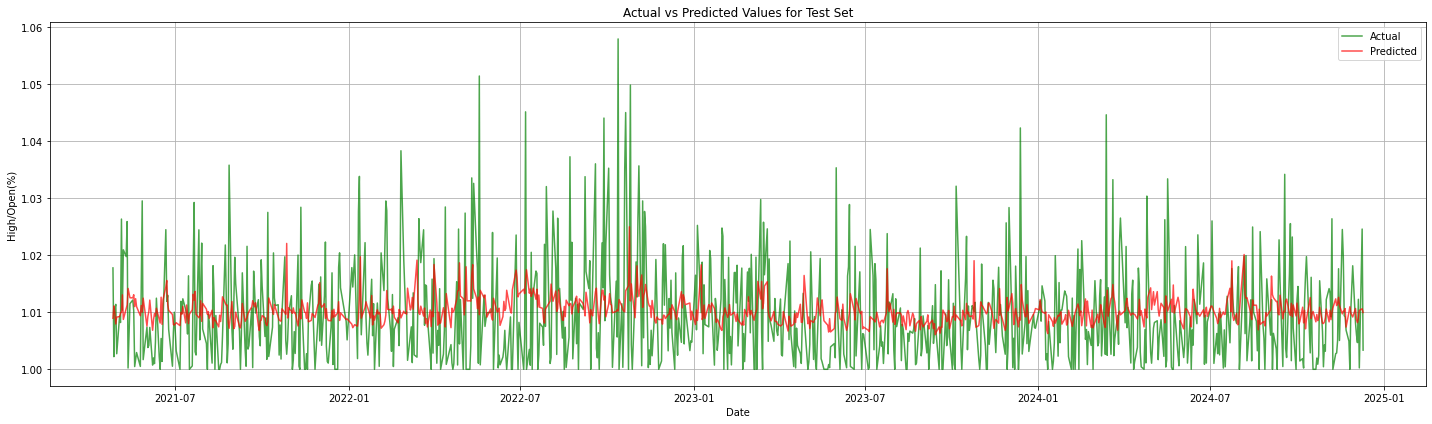

In [59]:
import matplotlib.pyplot as plt

test_dates = np.array(copx['Date'].iloc[len(y_train):])
actual_result = np.array(y_test)

plt.figure(figsize=(20, 6))

# Plot actual
plt.plot(test_dates, actual_result, label="Actual", c='green', alpha=0.7)

# Plot predicted
plt.plot(test_dates, y_pred_test, label="Predicted", c='red', alpha=0.7)

plt.title("Actual vs Predicted Values for Test Set")
plt.xlabel("Date")
plt.ylabel("High/Open(%)")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## EDA

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

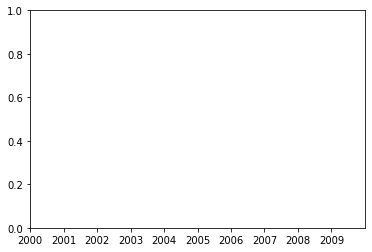

In [13]:
sns.lineplot(data=copx, x="Date", y="Close")
plt.show()

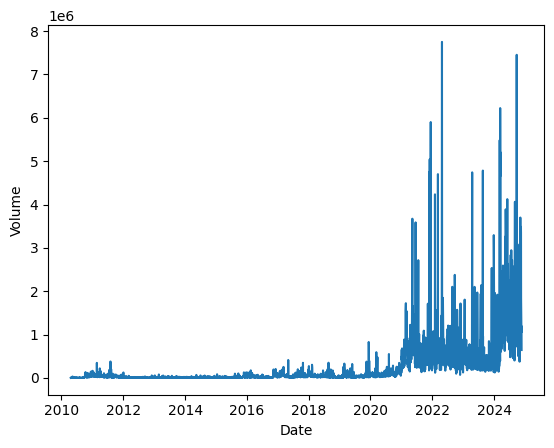

In [ ]:
sns.lineplot(data=copx, x="Date", y="Volume")
plt.show()

In [ ]:
# train_dates = np.array(copx['Date'].iloc[:len(y_train)])
# test_dates = np.array(copx['Date'].iloc[len(y_train):])
# full_dates = np.array(copx['Date'])
# actual_result = np.array(copx['High/Open(%)'])

# plt.figure(figsize=(12, 6))

# # Plot actual
# plt.plot(full_dates, actual_result, label="Actual", c='green', alpha=0.7)

# # Plot predicted
# plt.plot(train_dates, y_pred_train, label="Predicted (Train)", c='blue', alpha=0.7)
# plt.plot(test_dates, y_pred_test, label="Predicted (Test)", c='red', alpha=0.7)

# plt.title("Actual vs Predicted Values for Train and Test Sets")
# plt.xlabel("Date")
# plt.ylabel("High/Open(%)")

# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()